### Lê Nguyễn Minh Trung - Data Analyst Intern - 0972 861 446 - mtrungleng1309@gmail.com

In [1]:
#Import các thư viện cần thiết
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### 1. Tải tập dữ liệu về máy, sử dụng Python/Pandas để đọc và xem xét dữ liệu.

In [2]:
#Đọc tập tin dữ liệu
df = pd.read_csv('/TH_DataMining/Testing_DA/vgsales.csv')

In [3]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
#Kiểm tra kích thước của dataset
df.shape

(16598, 11)

In [5]:
#Kiểm tra các thông tin thống kê của dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [6]:
#Kiểm tra kiểu dữ liệu các thuộc tính của dataset (thay đổi nếu cần)
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [7]:
#Kiểm tra dòng trùng lặp
df.duplicated().sum()

0

#### 2. Làm sạch dữ liệu bằng cách xử lý missing values, outliers nếu cần thiết.

In [8]:
#Kiểm tra null values
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
#Tính tỉ lệ null values tồn tại ở mỗi thuộc tính được tìm thấy
Year_null = 271 / df.shape[0] * 100
Publisher_null = 58 / df.shape[0] * 100
print("Tỷ lệ giá trị null của thuộc tính Year: ", round(Year_null, 2), "%")
print("Tỷ lệ giá trị null của thuộc tính Publisher: ", round(Publisher_null, 2), "%")

Tỷ lệ giá trị null của thuộc tính Year:  1.63 %
Tỷ lệ giá trị null của thuộc tính Publisher:  0.35 %


Thuộc tính Year và thuộc tính Publisher tồn tại các giá trị null.

Số lượng giá trị null chỉ chiếm dưới 3% so với tổng số dòng của mỗi thuộc tính. Do đó chấp nhận việc loại bỏ các giá trị null.

In [10]:
#Loại bỏ các dòng chứa null values
df = df.dropna(subset=['Year', 'Publisher'])

In [11]:
#Kiểm tra lại null values
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [12]:
#Kiểm tra lại thông tin dataset sau khi xử lý null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [13]:
#Chuyển kiểu dữ liệu của cột Year từ float sang int
df['Year'] = df['Year'].astype('int64')

Thực hiện phân bố dữ liệu để kiểm tra ngoại lai, giá trị bất thường

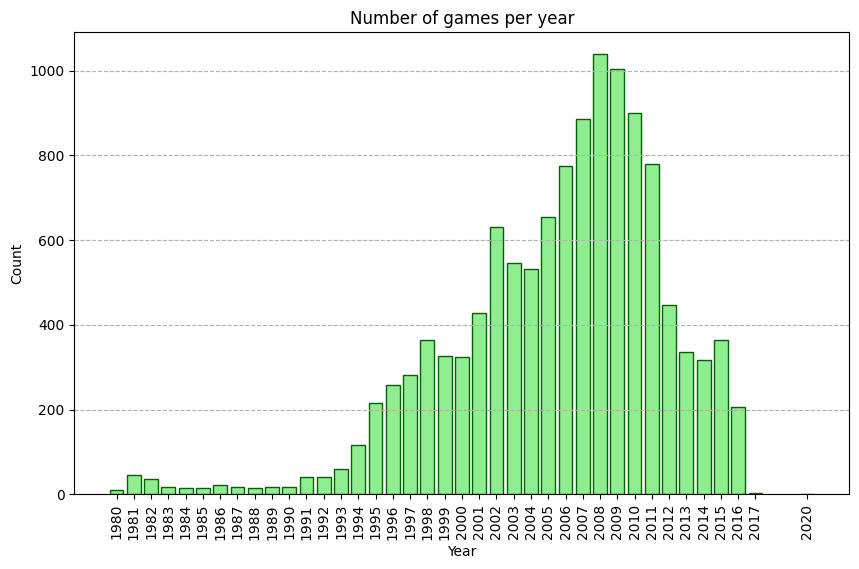

In [14]:
#Thuộc tính Year
num_games_year = df.groupby('Year')['Name'].nunique()

plt.figure(figsize=(10, 6))
plt.bar(num_games_year.index, num_games_year.values, color = "lightgreen", edgecolor = "darkgreen")
plt.title('Number of games per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(num_games_year.index, rotation=90)
plt.grid(axis='y', linestyle = 'dashed')
plt.show()

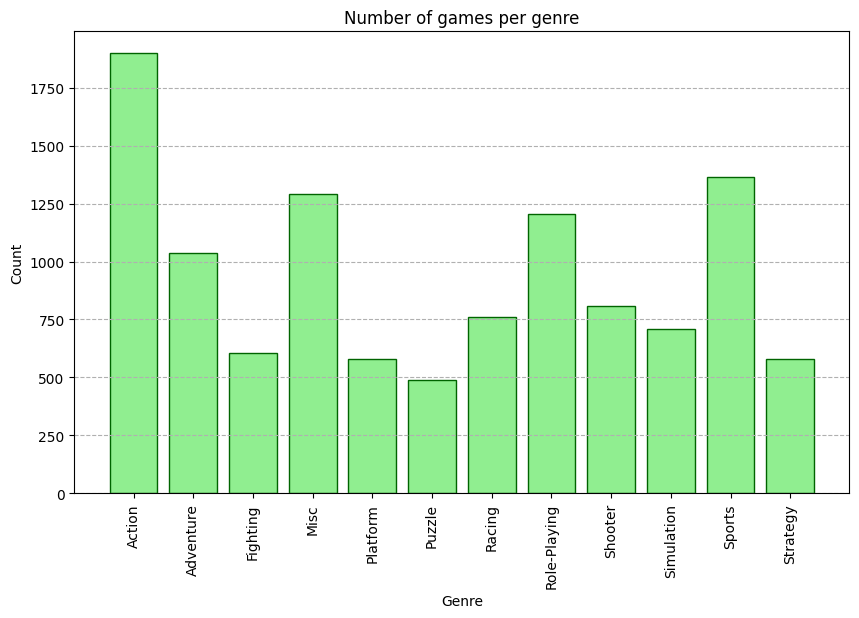

In [15]:
#Thuộc tính Genre
num_games_genre = df.groupby('Genre')['Name'].nunique()

plt.figure(figsize=(10, 6))
plt.bar(num_games_genre.index, num_games_genre.values, color = "lightgreen", edgecolor = "darkgreen")
plt.title('Number of games per genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(num_games_genre.index, rotation=90)
plt.grid(axis='y', linestyle = 'dashed')
plt.show()

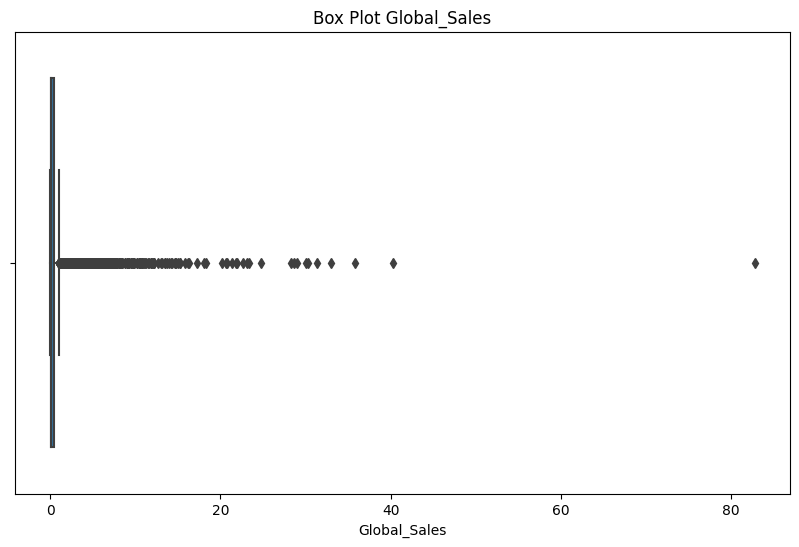

In [16]:
#Thuộc tính Global_Sales
plt.figure(figsize=(10, 6))
#plt.boxplot(df['Global_Sales'], vert=False)
plt.title('Box Plot Global_Sales')
sns.boxplot(data=df, x=df['Global_Sales'])
plt.show()

In [17]:
#Tính IQR
q1 = np.percentile(df['Global_Sales'], 25)
q3 = np.percentile(df['Global_Sales'], 75)
iqr = q3 - q1

#Xác định giá trị ngoại lệ dựa trên IQR
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

#Xác định outliers/inliers 
range_df = [x for x in df['Global_Sales'] if x >= lower_bound and x <= upper_bound]
print("Khoảng giá trị inliers: (", range_df[len(range_df) - 1], ", ",range_df[0], ")")
print("Số lượng dòng dữ liệu inliers: ", len(range_df))
print("Số lượng dòng dữ liệu outliers: ", (df.shape[0] - len(range_df)), "chiếm ", round(((df.shape[0] - len(range_df)) / df.shape[0] * 100), 2), "%")

Khoảng giá trị inliers: ( 0.01 ,  1.1 )
Số lượng dòng dữ liệu inliers:  14465
Số lượng dòng dữ liệu outliers:  1826 chiếm  11.21 %


Nhận xét: Dựa vào bar chart của thuộc tính Year, ở năm 2017 và năm 2020, số lượng game rất ít và không có dữ liệu ở năm 2018-2019. Do đó, loại bỏ các dòng dữ liệu có năm là 2017 và 2020; chỉ phân tích dữ liệu từ năm 1980-2016.

Dựa vào doanh số bán hàng toàn cầu, số lượng outliers hơn 11% nhưng không có dấu hiệu bất hợp lý (bởi các trò chơi có độ hot, được yêu thích có thể được mua và chơi nhiều). Nên dữ liệu vẫn được giữ nguyên.

In [18]:
#Chỉ giữ lại dữ liệu từ năm 1980 - 2016
df = df[(df['Year'] != 2017) & (df['Year'] != 2020)]

#### 3. Thống kê các thông tin chung như số lượng quan sát, các giá trị duy nhất trong từng cột, độ lệch chuẩn...

In [19]:
#Số lượng quan sát hiện tại
df.shape[0]

16287

In [20]:
#Các giá trị duy nhất trong từng cột
num_games_genre.index #Thuộc tính Genre


Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object', name='Genre')

In [21]:
num_games_year.index #Thuộc tính Year

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017, 2020],
           dtype='int64', name='Year')

In [22]:
num_games_platform = df.groupby('Platform')['Name'].nunique()
num_games_platform.index #Thuộc tính Platform

Index(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64',
       'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV',
       'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'],
      dtype='object', name='Platform')

In [23]:
num_games_publisher = df.groupby('Publisher')['Name'].nunique()
num_games_publisher.index #Thuộc tính Publisher

Index(['10TACLE Studios', '1C Company', '20th Century Fox Video Games',
       '2D Boy', '3DO', '49Games', '505 Games', '5pb', '7G//AMES',
       '989 Sports',
       ...
       'Zushi Games', 'bitComposer Games', 'dramatic create', 'fonfun', 'iWin',
       'id Software', 'imageepoch Inc.', 'inXile Entertainment', 'mixi, Inc',
       'responDESIGN'],
      dtype='object', name='Publisher', length=576)

In [24]:
#Kiểm tra lại các thông tin thống kê
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16287.0,8288.969853,4792.138597,1.00,4131.50,8291.00,12437.50,16600.00
Year,16287.0,2006.402775,5.830382,1980.00,2003.00,2007.00,2010.00,2016.00
NA_Sales,16287.0,0.265695,0.822525,0.00,0.00,0.08,0.24,41.49
EU_Sales,16287.0,0.147768,0.509360,0.00,0.00,0.02,0.11,29.02
JP_Sales,16287.0,0.078849,0.311916,0.00,0.00,0.00,0.04,10.22
Other_Sales,16287.0,0.048437,0.190105,0.00,0.00,0.01,0.04,10.57
Global_Sales,16287.0,0.541022,1.567520,0.01,0.06,0.17,0.48,82.74


#### 4. Phân tích doanh số bán hàng video game theo thời gian, hãng sản xuất, thể loại, nền tảng. Sử dụng các biểu đồ phù hợp.

##### Doanh số bán hàng video game toàn cầu và từng khu vực theo thời gian

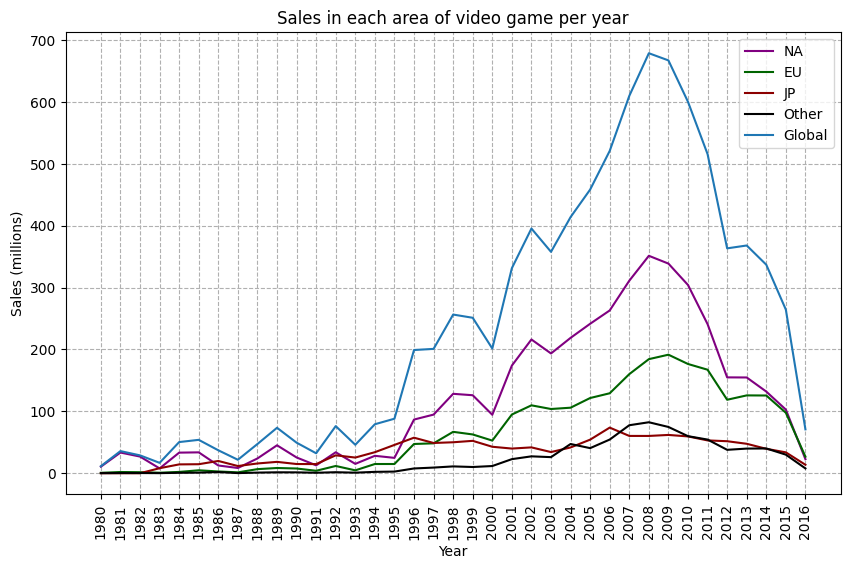

In [25]:
NA_sales_year = df.groupby('Year')['NA_Sales'].sum()
EU_sales_year = df.groupby('Year')['EU_Sales'].sum()
JP_sales_year = df.groupby('Year')['JP_Sales'].sum()
other_sales_year = df.groupby('Year')['Other_Sales'].sum()
global_sales_year = df.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(NA_sales_year.index, NA_sales_year.values, color = "purple", label = "NA")
plt.plot(NA_sales_year.index, EU_sales_year.values, color = "darkgreen", label = "EU")
plt.plot(NA_sales_year.index, JP_sales_year.values, color = "darkred", label = "JP")
plt.plot(NA_sales_year.index, other_sales_year.values, color = "black", label = "Other")
plt.plot(global_sales_year.index, global_sales_year.values, label = "Global")

plt.title('Sales in each area of video game per year')
plt.xlabel('Year')
plt.ylabel('Sales (millions)')
plt.xticks(NA_sales_year.index, rotation=90)
plt.grid(axis='both', linestyle = 'dashed')
plt.legend()
plt.show()

##### So sánh tổng doanh số bán hàng trong 5 năm gần nhất của từng khu vực

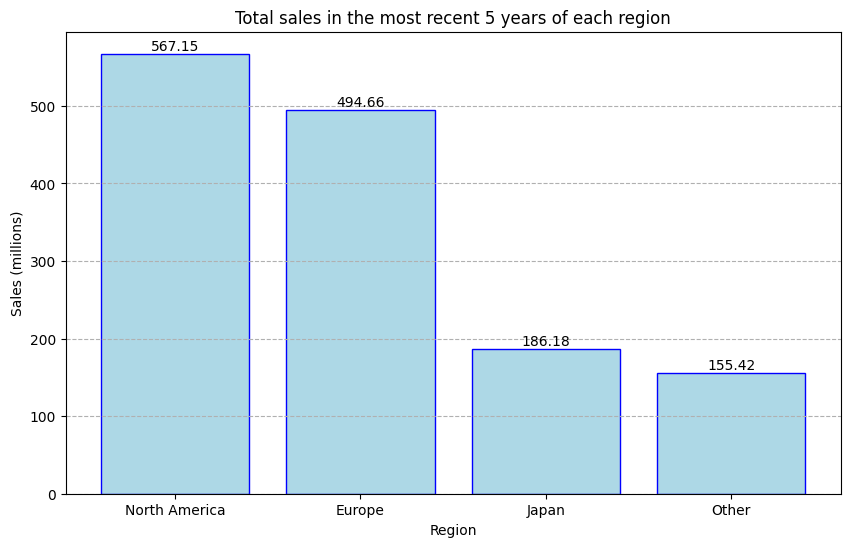

In [26]:
NA_last_5_years = NA_sales_year.tail(5).sum()
EU_last_5_years = EU_sales_year.tail(5).sum()
JP_last_5_years = JP_sales_year.tail(5).sum()
other_last_5_years = other_sales_year.tail(5).sum()

region = ['North America', 'Europe', 'Japan', 'Other']
last_5_years = [NA_last_5_years, EU_last_5_years, JP_last_5_years, other_last_5_years]

#Tạo biểu đồ bar
plt.figure(figsize=(10, 6))
plt.bar(region, last_5_years, color = "lightblue", edgecolor = "blue")
plt.title('Total sales in the most recent 5 years of each region')
plt.xlabel('Region')
plt.ylabel('Sales (millions)')
plt.xticks(region)
plt.grid(axis='y', linestyle = 'dashed')
for i, v in enumerate(np.round(last_5_years, 2)):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.show()

##### Top 10 hãng sản xuất có tổng doanh số bán hàng video game lớn nhất trên toàn cầu

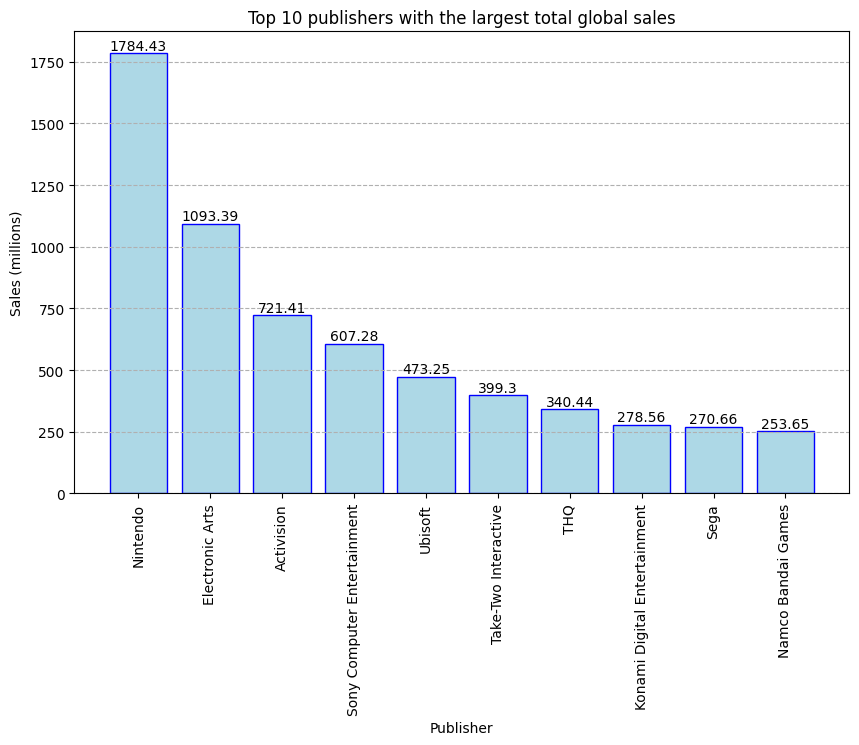

In [27]:
global_sales_publisher = df.groupby('Publisher')['Global_Sales'].sum()
top10_publisher = global_sales_publisher.nlargest(10)

plt.figure(figsize=(10, 6))
plt.bar(top10_publisher.index, top10_publisher.values, color = "lightblue", edgecolor = "blue")
plt.title('Top 10 publishers with the largest total global sales')
plt.xlabel('Publisher')
plt.ylabel('Sales (millions)')
plt.xticks(top10_publisher.index, rotation = 90)
plt.grid(axis='y', linestyle = 'dashed')
for i, v in enumerate(top10_publisher.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.show()

##### Top 5 hãng sản xuất có tổng doanh số bán hàng video game lớn nhất theo từng khu vực

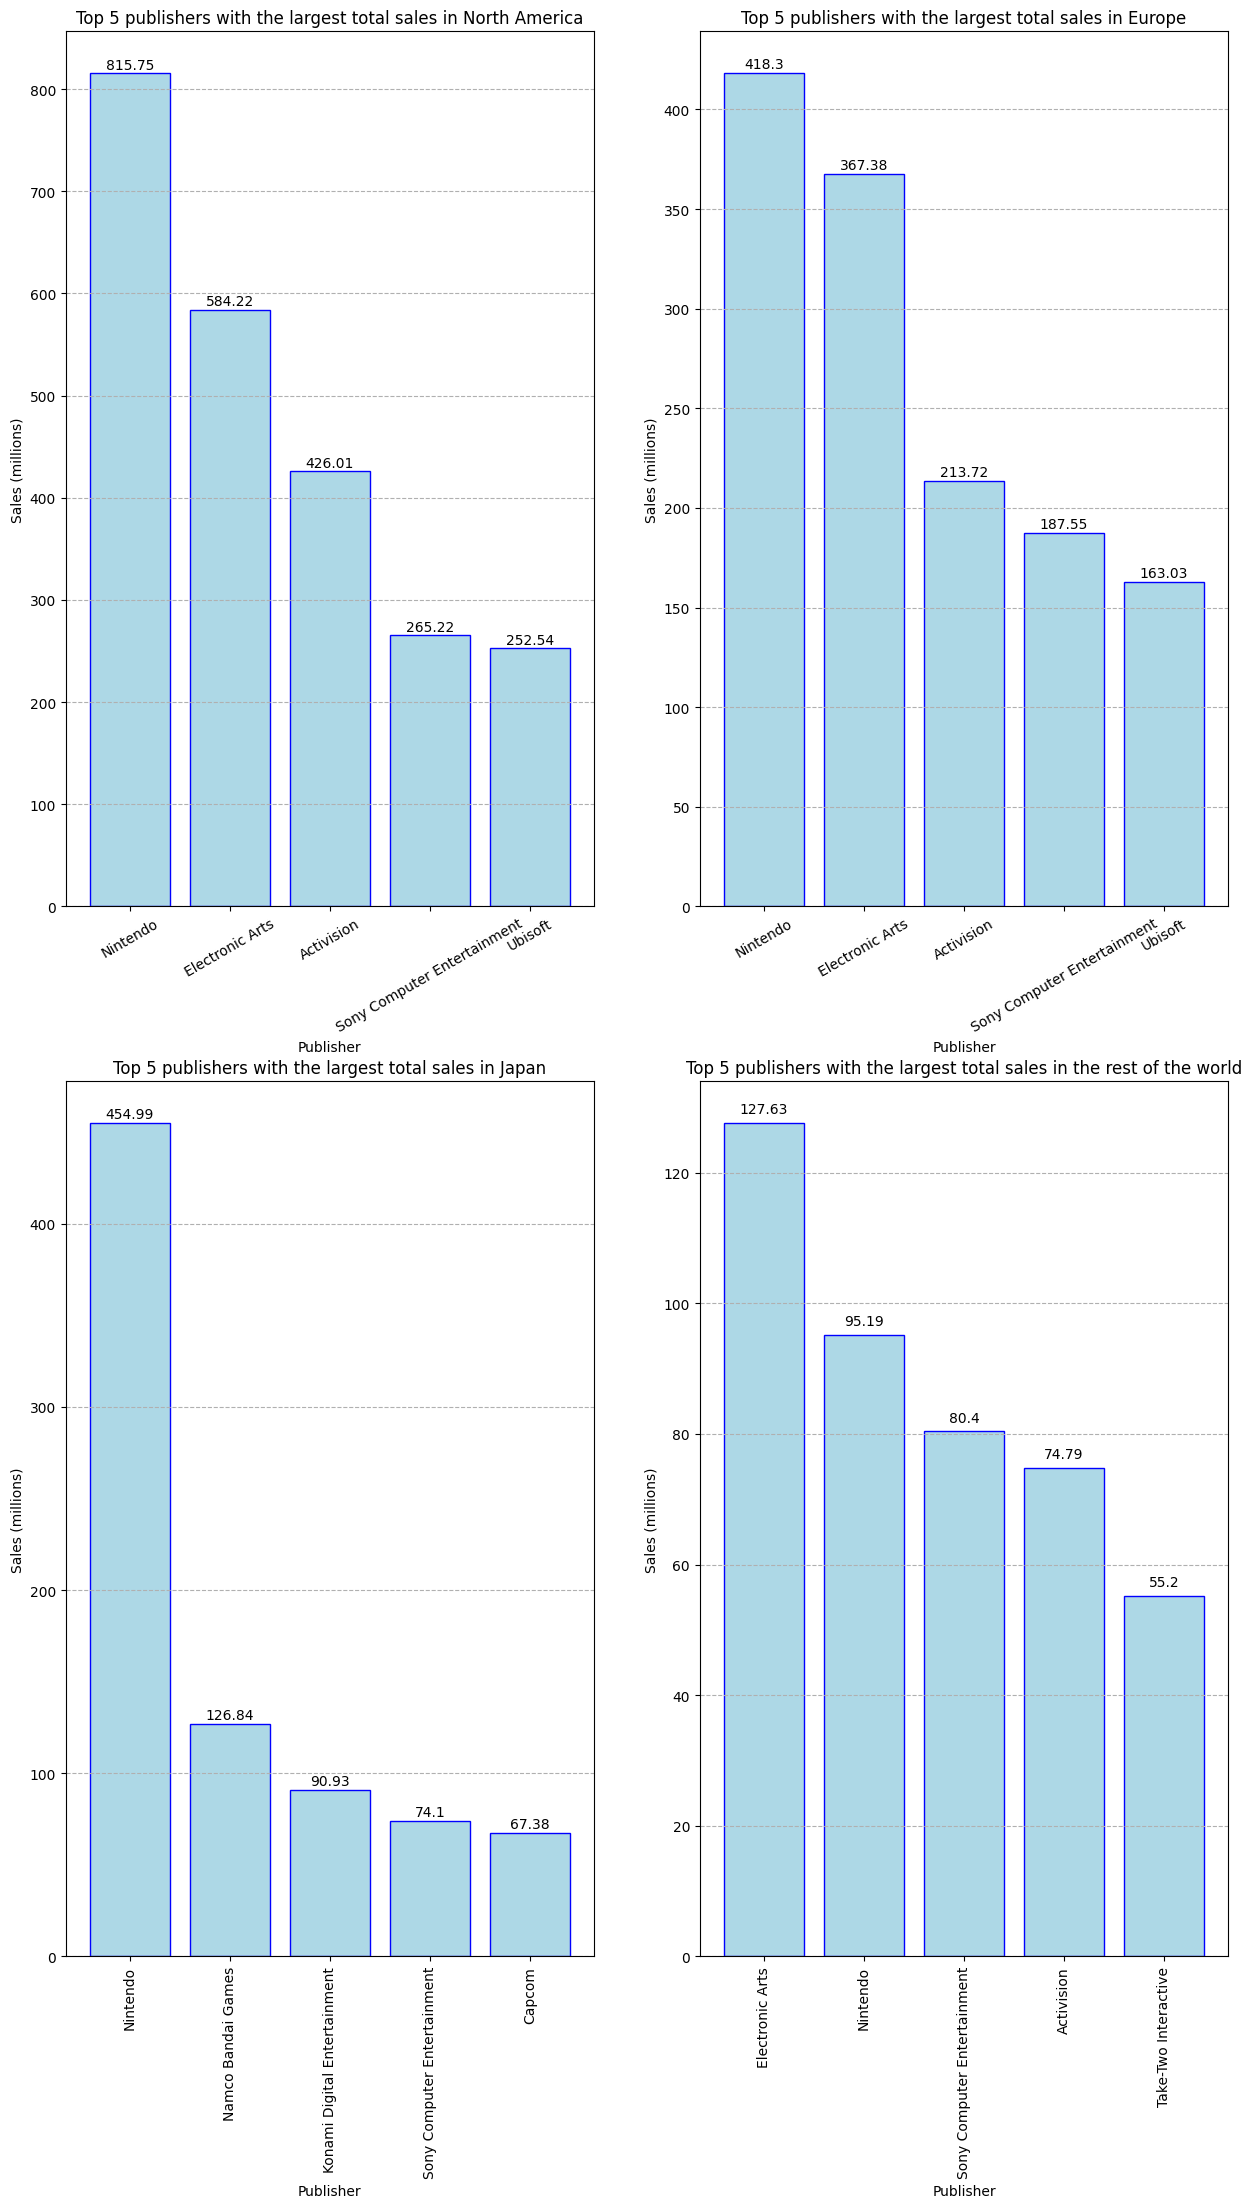

In [28]:
#Sales in North America
NA_sales_publisher = df.groupby('Publisher')['NA_Sales'].sum()
top5_NA_publisher = NA_sales_publisher.nlargest(5)

plt.figure(figsize=(15, 25))
plt.subplot(2, 2, 1)
plt.bar(top5_NA_publisher.index, top5_NA_publisher.values, color = "lightblue", edgecolor = "blue")
plt.title('Top 5 publishers with the largest total sales in North America')
plt.xlabel('Publisher')
plt.ylabel('Sales (millions)')
plt.xticks(top5_NA_publisher.index, rotation = 30)
plt.grid(axis='y', linestyle = 'dashed')
for i, v in enumerate(np.round(top5_NA_publisher.values, 2)):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

#Sales in Europe
EU_sales_publisher = df.groupby('Publisher')['EU_Sales'].sum()
top5_EU_publisher = EU_sales_publisher.nlargest(5)

plt.subplot(2, 2, 2)
plt.bar(top5_EU_publisher.index, top5_EU_publisher.values, color = "lightblue", edgecolor = "blue")
plt.title('Top 5 publishers with the largest total sales in Europe')
plt.xlabel('Publisher')
plt.ylabel('Sales (millions)')
plt.xticks(top5_EU_publisher.index, rotation = 30)
plt.grid(axis='y', linestyle = 'dashed')
for i, v in enumerate(np.round(top5_EU_publisher.values, 2)):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

#Sales in Japan
JP_sales_publisher = df.groupby('Publisher')['JP_Sales'].sum()
top5_JP_publisher = JP_sales_publisher.nlargest(5)

plt.subplot(2, 2, 3)
plt.bar(top5_JP_publisher.index, top5_JP_publisher.values, color = "lightblue", edgecolor = "blue")
plt.title('Top 5 publishers with the largest total sales in Japan')
plt.xlabel('Publisher')
plt.ylabel('Sales (millions)')
plt.xticks(top5_JP_publisher.index, rotation = 90)
plt.grid(axis='y', linestyle = 'dashed')
for i, v in enumerate(np.round(top5_JP_publisher.values, 2)):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

#Sales in the rest of the world
other_sales_publisher = df.groupby('Publisher')['Other_Sales'].sum()
top5_other_publisher = other_sales_publisher.nlargest(5)

plt.subplot(2, 2, 4)
plt.bar(top5_other_publisher.index, top5_other_publisher.values, color = "lightblue", edgecolor = "blue")
plt.title('Top 5 publishers with the largest total sales in the rest of the world')
plt.xlabel('Publisher')
plt.ylabel('Sales (millions)')
plt.xticks(top5_other_publisher.index, rotation = 90)
plt.grid(axis='y', linestyle = 'dashed')
for i, v in enumerate(np.round(top5_other_publisher.values, 2)):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.show()

##### Top 10 thể loại có tổng doanh số bán hàng video game lớn nhất trên toàn cầu

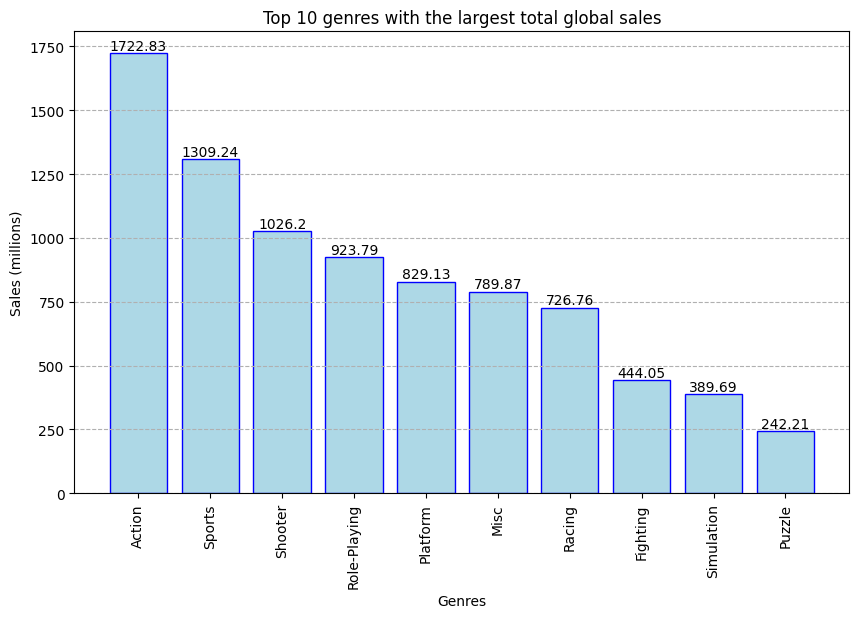

In [29]:
global_sales_genre = df.groupby('Genre')['Global_Sales'].sum()
top10_genre = global_sales_genre.nlargest(10)

plt.figure(figsize=(10, 6))
plt.bar(top10_genre.index, top10_genre.values, color = "lightblue", edgecolor = "blue")
plt.title('Top 10 genres with the largest total global sales')
plt.xlabel('Genres')
plt.ylabel('Sales (millions)')
plt.xticks(top10_genre.index, rotation = 90)
plt.grid(axis='y', linestyle = 'dashed')
for i, v in enumerate(top10_genre.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.show()

##### Top 5 thể loại có tổng doanh số bán hàng video game lớn nhất theo từng khu vực

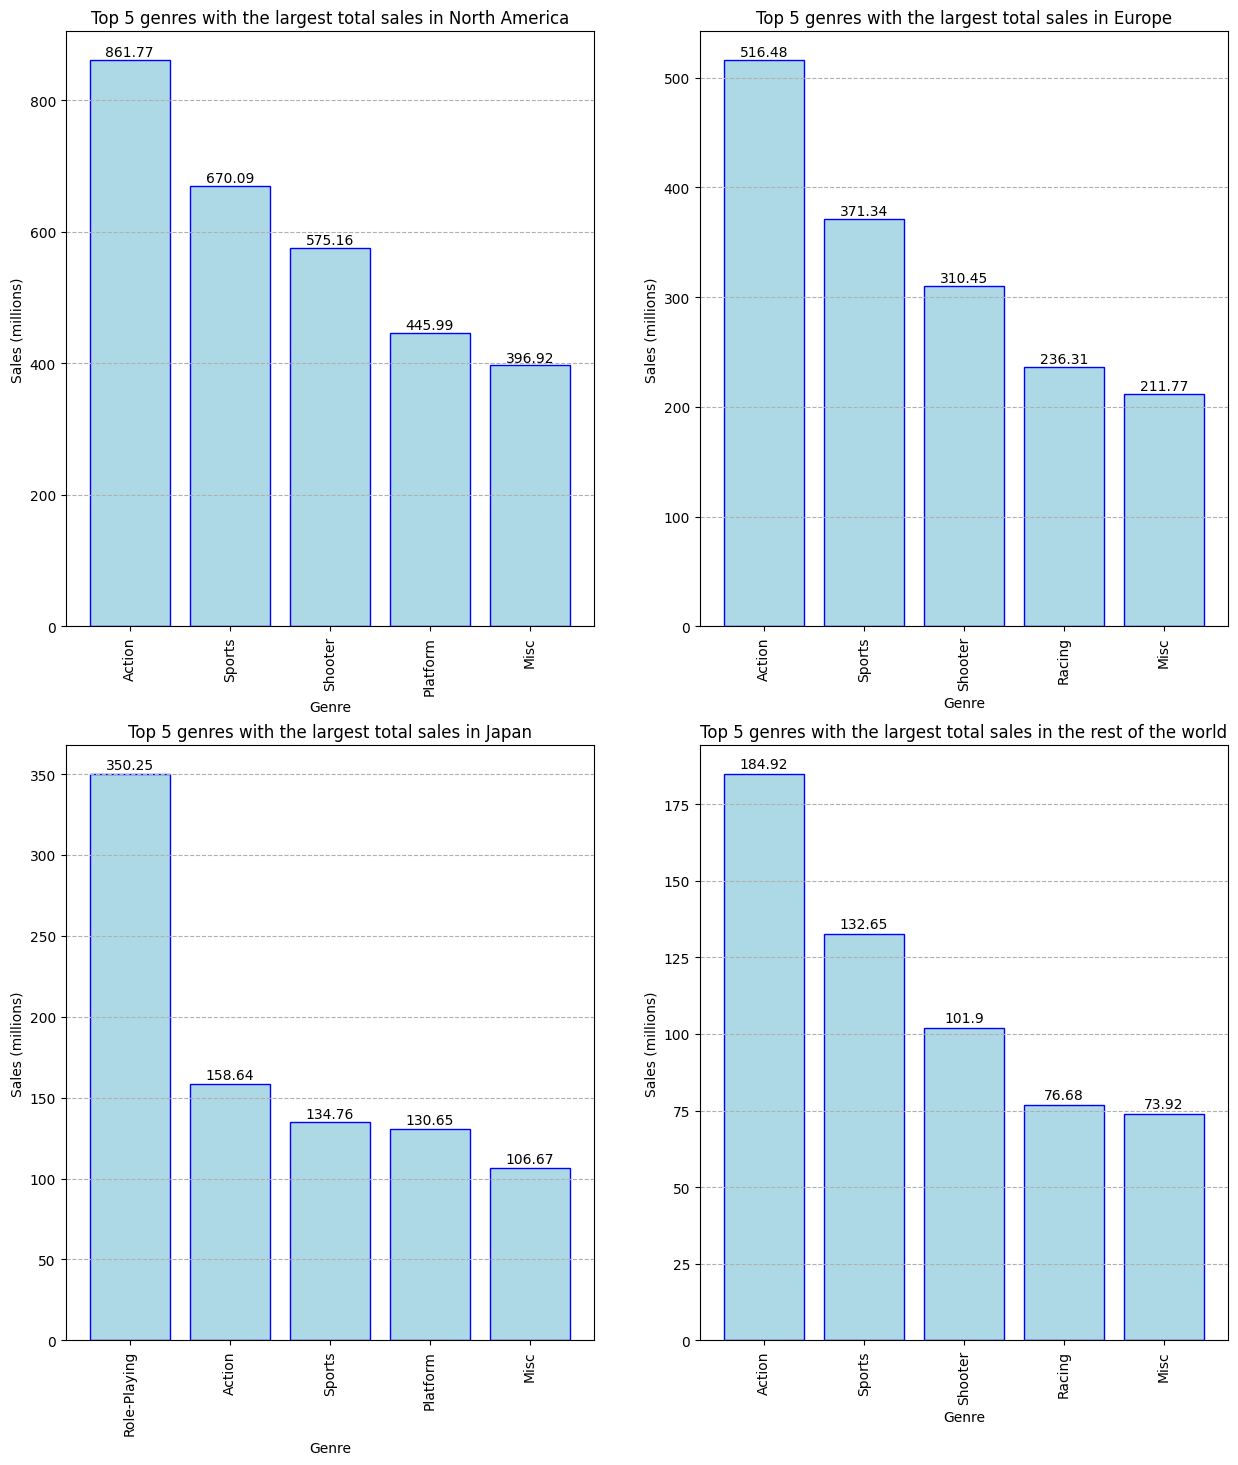

In [30]:
#Sales in North America
NA_sales_genre = df.groupby('Genre')['NA_Sales'].sum()
top5_NA_genre = NA_sales_genre.nlargest(5)

plt.figure(figsize=(15,17))
plt.subplot(2, 2, 1)
plt.bar(top5_NA_genre.index, top5_NA_genre.values, color = "lightblue", edgecolor = "blue")
plt.title('Top 5 genres with the largest total sales in North America')
plt.xlabel('Genre')
plt.ylabel('Sales (millions)')
plt.xticks(top5_NA_genre.index, rotation = 90)
plt.grid(axis='y', linestyle = 'dashed')
for i, v in enumerate(np.round(top5_NA_genre.values, 2)):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

#Sales in Europe
EU_sales_genre = df.groupby('Genre')['EU_Sales'].sum()
top5_EU_genre = EU_sales_genre.nlargest(5)

plt.subplot(2, 2, 2)
plt.bar(top5_EU_genre.index, top5_EU_genre.values, color = "lightblue", edgecolor = "blue")
plt.title('Top 5 genres with the largest total sales in Europe')
plt.xlabel('Genre')
plt.ylabel('Sales (millions)')
plt.xticks(top5_EU_genre.index, rotation = 90)
plt.grid(axis='y', linestyle = 'dashed')
for i, v in enumerate(np.round(top5_EU_genre.values, 2)):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

#Sales in Japan
JP_sales_genre = df.groupby('Genre')['JP_Sales'].sum()
top5_JP_genre = JP_sales_genre.nlargest(5)

plt.subplot(2, 2, 3)
plt.bar(top5_JP_genre.index, top5_JP_genre.values, color = "lightblue", edgecolor = "blue")
plt.title('Top 5 genres with the largest total sales in Japan')
plt.xlabel('Genre')
plt.ylabel('Sales (millions)')
plt.xticks(top5_JP_genre.index, rotation = 90)
plt.grid(axis='y', linestyle = 'dashed')
for i, v in enumerate(np.round(top5_JP_genre.values, 2)):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

#Sales in the rest of the world
other_sales_genre = df.groupby('Genre')['Other_Sales'].sum()
top5_other_genre = other_sales_genre.nlargest(5)

plt.subplot(2, 2, 4)
plt.bar(top5_other_genre.index, top5_other_genre.values, color = "lightblue", edgecolor = "blue")
plt.title('Top 5 genres with the largest total sales in the rest of the world')
plt.xlabel('Genre')
plt.ylabel('Sales (millions)')
plt.xticks(top5_other_genre.index, rotation = 90)
plt.grid(axis='y', linestyle = 'dashed')
for i, v in enumerate(np.round(top5_other_genre.values, 2)):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.show()

##### Top 10 nền tảng có tổng doanh số bán hàng video game lớn nhất trên toàn cầu

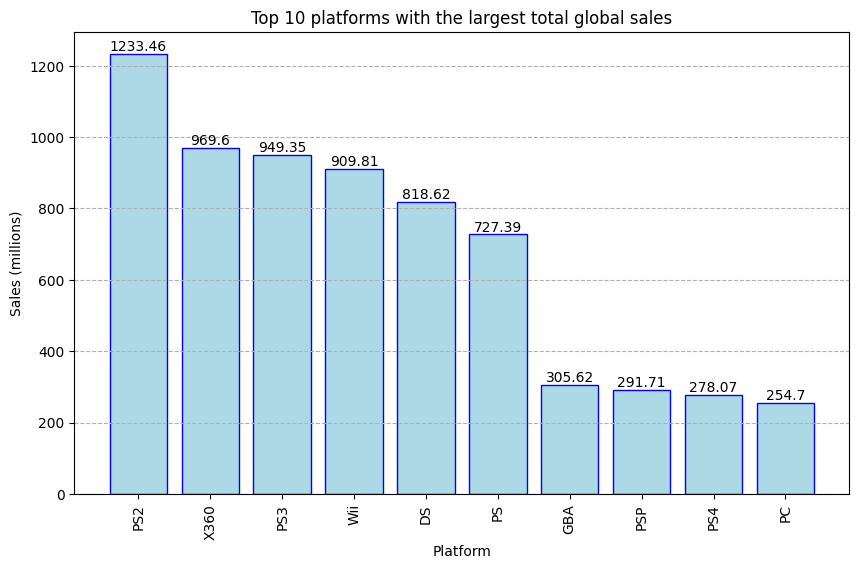

In [31]:
global_sales_platform = df.groupby('Platform')['Global_Sales'].sum()
top10_platform = global_sales_platform.nlargest(10)

plt.figure(figsize=(10, 6))
plt.bar(top10_platform.index, top10_platform.values, color = "lightblue", edgecolor = "blue")
plt.title('Top 10 platforms with the largest total global sales')
plt.xlabel('Platform')
plt.ylabel('Sales (millions)')
plt.xticks(top10_platform.index, rotation = 90)
plt.grid(axis='y', linestyle = 'dashed')
for i, v in enumerate(top10_platform.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.show()

##### Top 5 nền tảng có tổng doanh số bán hàng video game lớn nhất theo từng khu vực

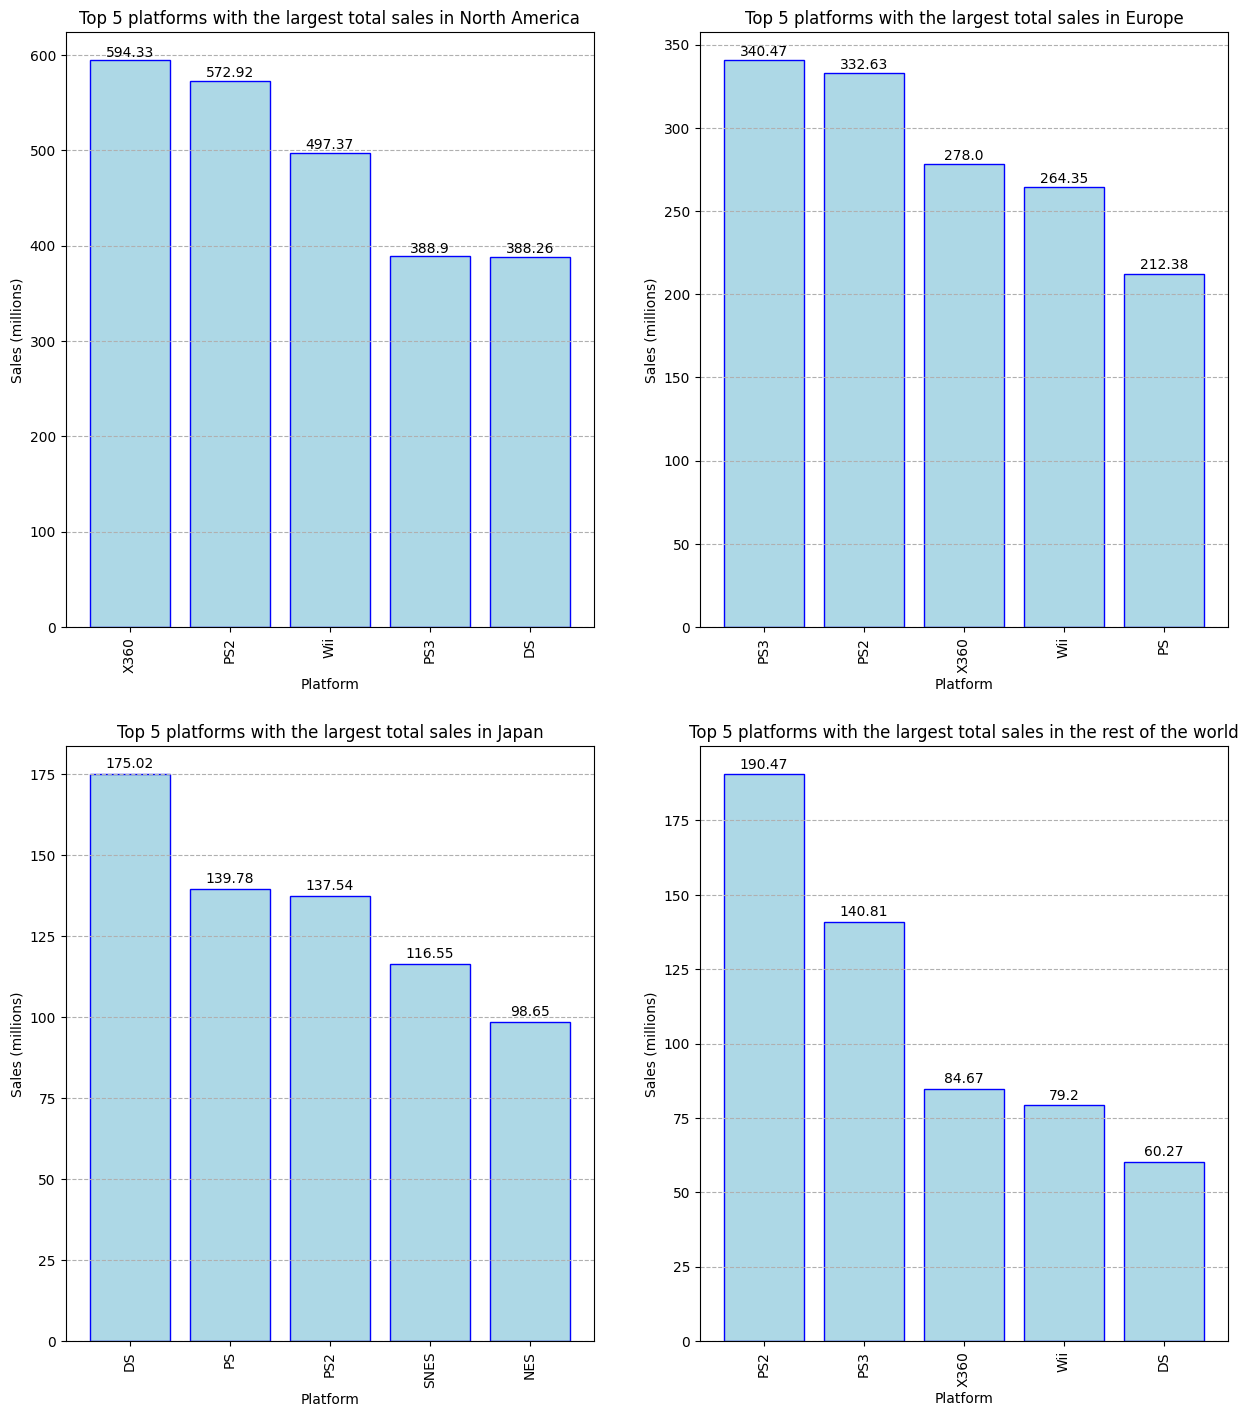

In [32]:
#Sales in North America
NA_sales_platform = df.groupby('Platform')['NA_Sales'].sum()
top5_NA_platform = NA_sales_platform.nlargest(5)

plt.figure(figsize=(15,17))
plt.subplot(2, 2, 1)
plt.bar(top5_NA_platform.index, top5_NA_platform.values, color = "lightblue", edgecolor = "blue")
plt.title('Top 5 platforms with the largest total sales in North America')
plt.xlabel('Platform')
plt.ylabel('Sales (millions)')
plt.xticks(top5_NA_platform.index, rotation = 90)
plt.grid(axis='y', linestyle = 'dashed')
for i, v in enumerate(np.round(top5_NA_platform.values, 2)):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

#Sales in Europe
EU_sales_platform = df.groupby('Platform')['EU_Sales'].sum()
top5_EU_platform = EU_sales_platform.nlargest(5)

plt.subplot(2, 2, 2)
plt.bar(top5_EU_platform.index, top5_EU_platform.values, color = "lightblue", edgecolor = "blue")
plt.title('Top 5 platforms with the largest total sales in Europe')
plt.xlabel('Platform')
plt.ylabel('Sales (millions)')
plt.xticks(top5_EU_platform.index, rotation = 90)
plt.grid(axis='y', linestyle = 'dashed')
for i, v in enumerate(np.round(top5_EU_platform.values, 2)):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

#Sales in Japan
JP_sales_platform = df.groupby('Platform')['JP_Sales'].sum()
top5_JP_platform = JP_sales_platform.nlargest(5)

plt.subplot(2, 2, 3)
plt.bar(top5_JP_platform.index, top5_JP_platform.values, color = "lightblue", edgecolor = "blue")
plt.title('Top 5 platforms with the largest total sales in Japan')
plt.xlabel('Platform')
plt.ylabel('Sales (millions)')
plt.xticks(top5_JP_platform.index, rotation = 90)
plt.grid(axis='y', linestyle = 'dashed')
for i, v in enumerate(np.round(top5_JP_platform.values, 2)):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

#Sales in the rest of the world
other_sales_platform = df.groupby('Platform')['Other_Sales'].sum()
top5_other_platform = other_sales_platform.nlargest(5)

plt.subplot(2, 2, 4)
plt.bar(top5_other_platform.index, top5_other_platform.values, color = "lightblue", edgecolor = "blue")
plt.title('Top 5 platforms with the largest total sales in the rest of the world')
plt.xlabel('Platform')
plt.ylabel('Sales (millions)')
plt.xticks(top5_other_platform.index, rotation = 90)
plt.grid(axis='y', linestyle = 'dashed')
for i, v in enumerate(np.round(top5_other_platform.values, 2)):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')

plt.show()

##### Top 10 nền tảng phù hợp nhiều video game nhất

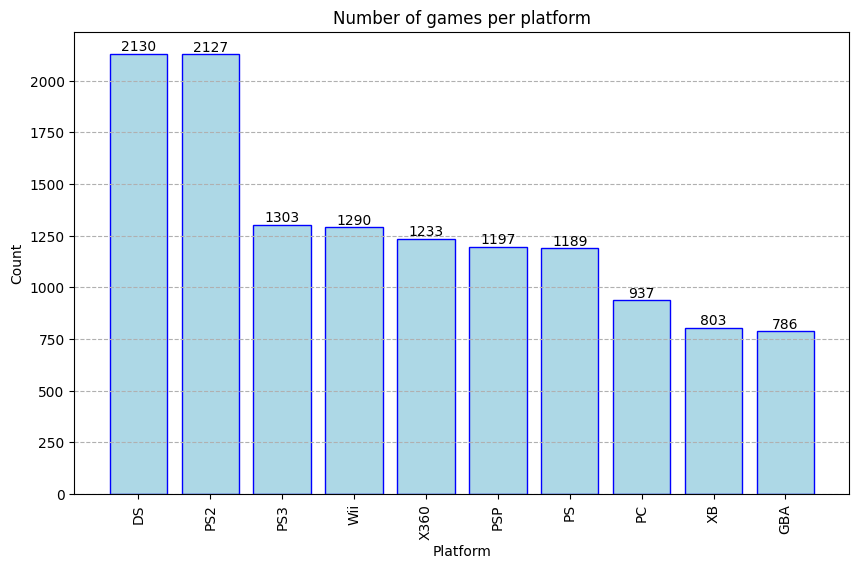

In [33]:
num_games_platform = df.groupby('Platform')['Name'].nunique()
top10_num_games_platform = num_games_platform.nlargest(10)

plt.figure(figsize=(10, 6))
plt.bar(top10_num_games_platform.index, top10_num_games_platform.values, color = "lightblue", edgecolor = "blue")
plt.title('Number of games per platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(top10_num_games_platform.index, rotation=90)
plt.grid(axis='y', linestyle = 'dashed')
for i, v in enumerate(top10_num_games_platform.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.show()

#### 5. Tìm ra các thể loại và nền tảng video game phổ biến nhất.

##### Ở yêu cầu này, em chưa rõ "phổ biến nhất" là "có tổng doanh số bán hàng trên toàn cầu lớn nhất" hay "xuất hiện nhiều nhất qua các năm". Do đó, em xin thực hiện cả 2 cách mà em hiểu.

Thể loại có tổng doanh số bán hàng trên toàn cầu lớn nhất là Hành động (Action) với 1722.83 triệu.

Nền tảng có tổng doanh số bán hàng trên toàn cầu lớn nhất là PS2 với 1233.46 triệu.

In [34]:
genre_by_year = df.groupby('Genre')['Year'].nunique()
genre_by_year.nlargest(3)

Genre
Action      37
Sports      37
Platform    36
Name: Year, dtype: int64

In [35]:
platform_by_year = df.groupby('Platform')['Year'].nunique()
platform_by_year.nlargest(3)

Platform
PC    26
GB    13
DS    12
Name: Year, dtype: int64

Thể loại xuất hiện nhiều nhất qua các năm là Hành động (Action) và Thể thao (Sports) với 37 lần xuất hiện.

Nền tảng xuất hiện nhiều nhất qua các năm là PC với 26 lần xuất hiện.

#### 6. So sánh doanh số bán hàng của các hãng sản xuất lớn.

In [36]:
top10_publisher

Publisher
Nintendo                        1784.43
Electronic Arts                 1093.39
Activision                       721.41
Sony Computer Entertainment      607.28
Ubisoft                          473.25
Take-Two Interactive             399.30
THQ                              340.44
Konami Digital Entertainment     278.56
Sega                             270.66
Namco Bandai Games               253.65
Name: Global_Sales, dtype: float64

Em sẽ lấy top 5 hãng sản xuất có tổng doanh số bán hàng lớn nhất trên toàn cầu là Nintendo, Electronic Arts, Activision, Sony Computer Entertainment và Ubisoft. Sau đó, em sẽ so sánh doanh số bán hàng của 5 hãng sản xuất này theo từng khu vực.

In [37]:
df_publisher = df[df['Publisher'].isin(['Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment', 'Ubisoft'])]

NA_sales_publisher = df_publisher.groupby('Publisher')['NA_Sales'].sum()
EU_sales_publisher = df_publisher.groupby('Publisher')['EU_Sales'].sum()
JP_sales_publisher = df_publisher.groupby('Publisher')['JP_Sales'].sum()
other_sales_publisher = df_publisher.groupby('Publisher')['Other_Sales'].sum()

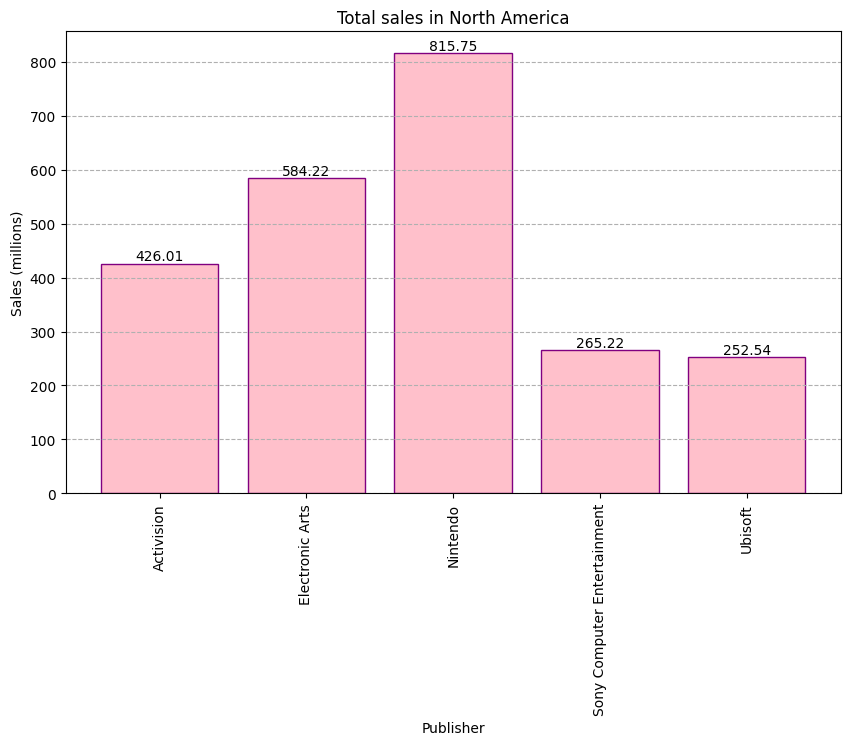

In [38]:
#Sales in North America
plt.figure(figsize=(10, 6))
plt.bar(NA_sales_publisher.index, NA_sales_publisher.values, color = "pink", edgecolor = "purple")
plt.title('Total sales in North America')
plt.xlabel('Publisher')
plt.ylabel('Sales (millions)')
plt.xticks(NA_sales_publisher.index, rotation = 90)
plt.grid(axis='y', linestyle = 'dashed')
for i, v in enumerate(np.round(NA_sales_publisher.values, 2)):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.show()

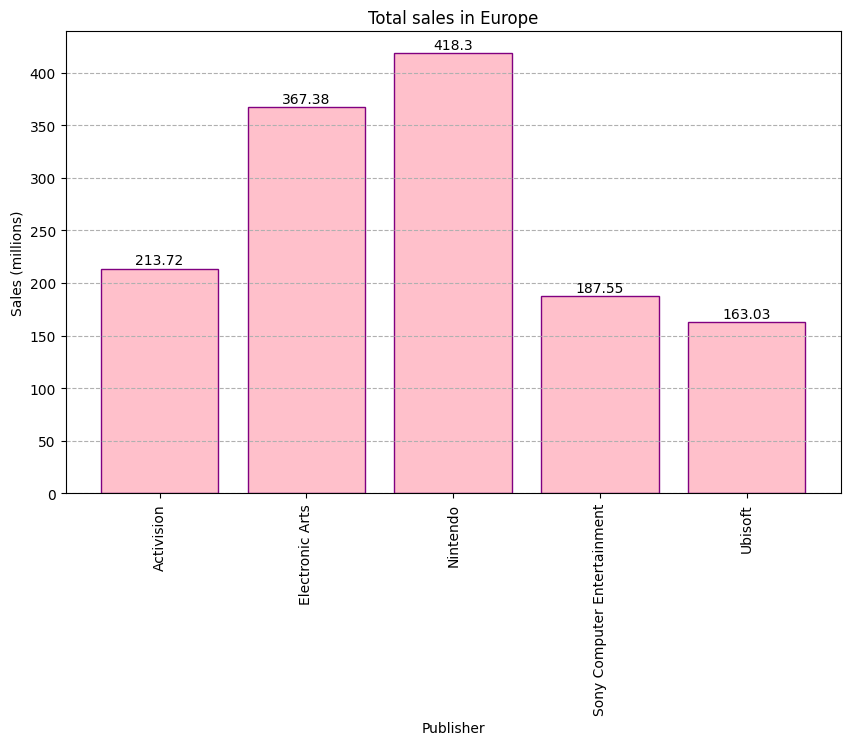

In [39]:
#Sales in Europe
plt.figure(figsize=(10, 6))
plt.bar(EU_sales_publisher.index, EU_sales_publisher.values, color = "pink", edgecolor = "purple")
plt.title('Total sales in Europe')
plt.xlabel('Publisher')
plt.ylabel('Sales (millions)')
plt.xticks(EU_sales_publisher.index, rotation = 90)
plt.grid(axis='y', linestyle = 'dashed')
for i, v in enumerate(np.round(EU_sales_publisher.values, 2)):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.show()

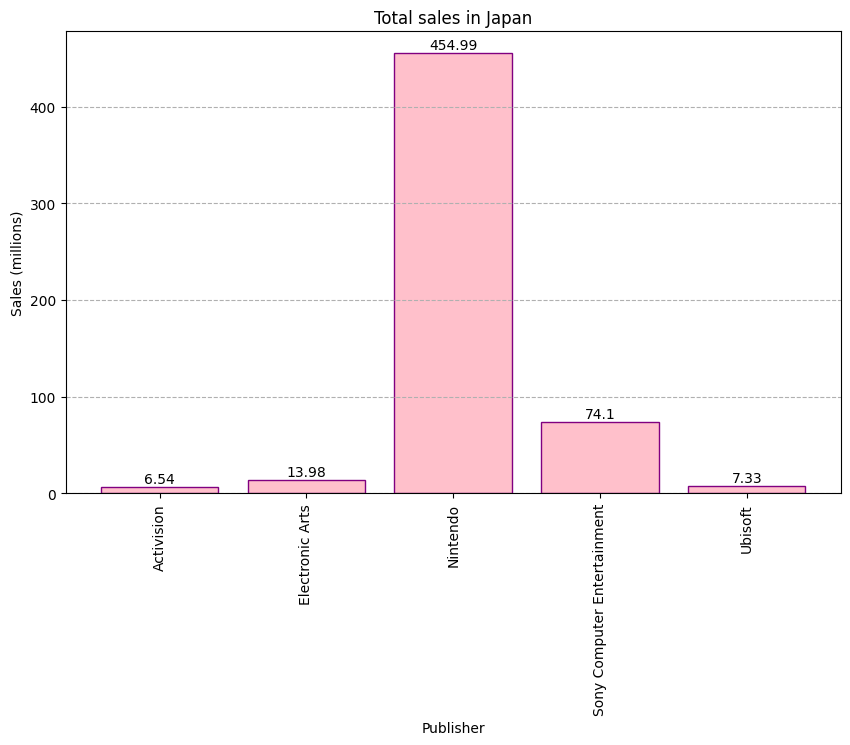

In [40]:
#Sales in Japan
plt.figure(figsize=(10, 6))
plt.bar(JP_sales_publisher.index, JP_sales_publisher.values, color = "pink", edgecolor = "purple")
plt.title('Total sales in Japan')
plt.xlabel('Publisher')
plt.ylabel('Sales (millions)')
plt.xticks(JP_sales_publisher.index, rotation = 90)
plt.grid(axis='y', linestyle = 'dashed')
for i, v in enumerate(np.round(JP_sales_publisher.values, 2)):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.show()

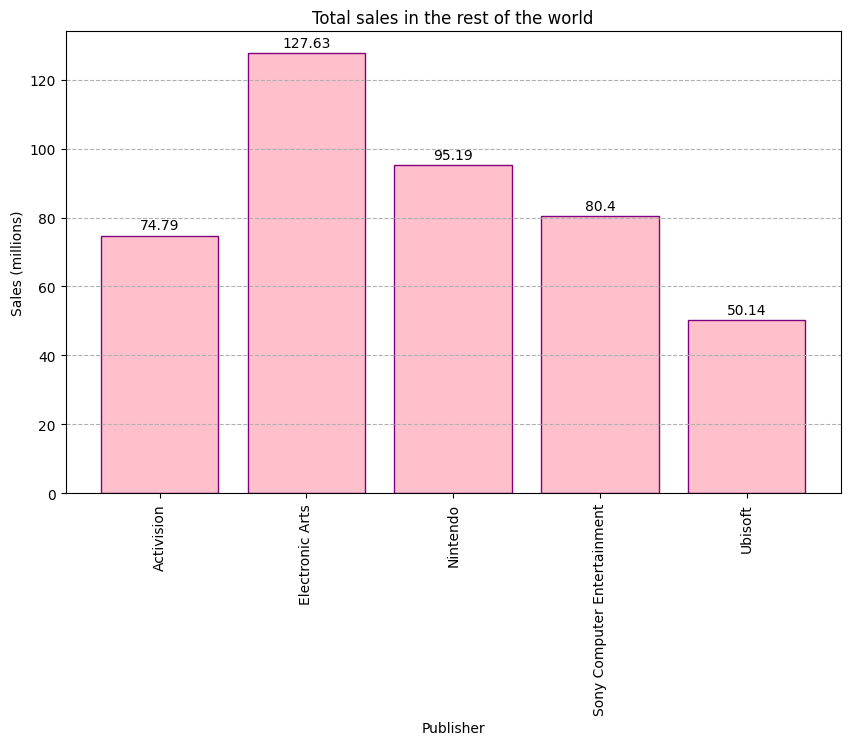

In [41]:
#Sales in the rest of the world
plt.figure(figsize=(10, 6))
plt.bar(other_sales_publisher.index, other_sales_publisher.values, color = "pink", edgecolor = "purple")
plt.title('Total sales in the rest of the world')
plt.xlabel('Publisher')
plt.ylabel('Sales (millions)')
plt.xticks(other_sales_publisher.index, rotation = 90)
plt.grid(axis='y', linestyle = 'dashed')
for i, v in enumerate(np.round(other_sales_publisher.values, 2)):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.show()

#### 7. Tìm ra xu hướng doanh số bán hàng video game qua các năm

Bước sang thế kỷ thứ 21, doanh số bán hàng video game tăng mạnh. Đỉnh điểm ở năm 2008. Tuy nhiên, sau 2008-2009, doanh số bán hàng lại tụt dốc... gần như về lại mức trước năm 2000.

Kể từ sau năm 2000, Bắc Mỹ luôn là khu vực dẫn đầu về doanh số bán hàng video game.

Về hãng sản xuất: Nintendo dẫn đầu và vượt trội so với các hãng khác. Tiếp sau đó, lần lượt là Electronic Arts, Activision, Sony Computer Entertainment và Ubisoft. Top 5 này không thay đổi ở hai khu vực là Bắc Mỹ và Châu Âu. Riêng ở khu vực Nhật Bản, Nintendo rất được ưa chuộng với doanh số cách biệt lớn so với các hãng xếp sau đó. Khác với 3 khu vực vừa nêu, hãng Electronic Arts đứng đầu về doanh số bán hàng.

Về thể loại: Action là thể loại đứng nhất về doanh số, xếp sau đó là Sports. Các thể loại sau không có khoảng cách lớn về doanh số lần lượt là Shooter, Role-Playing, Platform, Misc và Racing. 
Tại thị trường Bắc Mỹ và Châu Âu khá tương đồng về thể loại ở top 5 lượt lần là Action, Sports, Shooter và Misc. Riêng vị trí thứ 4 ở Bắc Mỹ là Platform, còn Europe là Racing.
Khác với 2 khu vực nêu trên, tại Nhật Bản, Role-Playing là thể loại được ưa chuộng nhất, gấp đôi thể loại đứng thứ 2 về doanh số là Action. Với các khu vực ngoài khác, top 5 tương đồng với khu vực Châu Âu.

Về nền tảng: PS2 là nền tảng video game bán chạy nhất. Tuy nhiên nên cân nhắc về PS3 và sau đó là PS4 bởi đây là các phiên bản nâng cấp sau đó, tiềm năng phát triển trong tương lai. Các nền tảng bán chạy khác lần lượt là X360, PS3, Wii, DS và PS.
Thị trường Bắc Mỹ và Châu Âu không khác nhau là mấy về top 5 nền tảng có doanh số cao nhất, khác về thứ tự. Với Bắc Mỹ lần lượt là X360, PS2, Wii, PS3 và DS. Với Châu Âu lần lượt là PS3, PS2, X360, Wii và PS.
Ở thị trường Nhật Bản, DS là nền tảng đứng nhất. Sau đó lần lượt là PS và PS2. Hai nền tảng khác chưa được nhắc tới xuất hiện ở 2 vị trí còn lại trong top 5 là SNES và NES. Với các khu vực khác, PS2 và PS3 chiếm phần lớn về doanh số bán hàng, xếp sau đó lần lượt là X360, Wii và DS.

DS và PS2 là hai nền tảng có số lượng video game nhiều nhất. Tuy nhiên DS đứng thứ 5 về doanh số bán, còn PS2 có thể dần bị thay thế bởi PS3 và tương lai là PS4. Do đó cân nhắc về các nền tảng có ít video game hơn nhưng mang doanh số cao như X360 và Wii. Đồng thời,  nên “đón đầu” nền tảng PS4 trước sự thành công to lớn của PS2 và PS3.

